### Analysis of Recipes on food.com 

food.com is a popular online platform that provides a wide range of resources related to food and cooking. It is a website where users can find recipes, cooking tips, meal ideas, and other culinary information. 

We relocated from India to US recently and I am making an attempt to find ways to get closer to food outside the Indian cooking format (apart from spending time studying US history). Most recipes are completely new, others not so much. The more I work with this dataset, I am realizing that the few recipes I know, are also localized as per convenience :)

My 'outside the kitchen' attempt below:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_tags = pd.read_csv('/Users/vaishaliverma/Documents/EDA2/RAW_recipes.csv', nrows= 10000)
df_tags = df_tags.drop(['id', 'contributor_id', 'submitted', 'steps', 'description', 'nutrition', 'n_steps', 'minutes', 'n_ingredients', 'ingredients'], axis=1)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

df = pd.read_csv('/Users/vaishaliverma/Documents/EDA/RAW_recipes.csv', nrows=10000)
df['tags'] = df_tags['tags'].tolist()
nutrition = []

for index, row in df.iterrows():
    row['nutrition'] = eval(row['nutrition'])
    row['nutrition'] = row['nutrition'][:5] + row['nutrition'][6:]
    nutrition.append(row['nutrition'])
df['nutrition'] = nutrition
  
display(df.head(5))


,name,minutes,nutrition,n_steps,ingredients,n_ingredients,tags
0,arriba baked winter squash mexican style,55,"[51.5, 0.0, 13.0, 0.0, 2.0, 4.0]",11,"['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']",7,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']"
1,a bit different breakfast pizza,30,"[173.4, 18.0, 0.0, 17.0, 22.0, 1.0]",9,"['prepared pizza crust', 'sausage patty', 'eggs', 'milk', 'salt and pepper', 'cheese']",6,"['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']"
2,all in the kitchen chili,130,"[269.8, 22.0, 32.0, 48.0, 39.0, 5.0]",6,"['ground beef', 'yellow onions', 'diced tomatoes', 'tomato paste', 'tomato soup', 'rotel tomatoes', 'kidney beans', 'water', 'chili powder', 'ground cumin', 'salt', 'lettuce', 'cheddar cheese']",13,"['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']"
3,alouette potatoes,45,"[368.1, 17.0, 10.0, 2.0, 14.0, 20.0]",11,"['spreadable cheese with garlic and herbs', 'new potatoes', 'shallots', 'parsley', 'tarragon', 'olive oil', 'red wine vinegar', 'salt', 'pepper', 'red bell pepper', 'yellow bell pepper']",11,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'side-dishes', 'eggs-dairy', 'potatoes', 'vegetables', 'oven', 'easy', 'dinner-party', 'holiday-event', 'easter', 'cheese', 'stove-top', 'dietary', 'christmas', 'new-years', 'thanksgiving', 'independence-day', 'st-patricks-day', 'valentines-day', 'inexpensive', 'brunch', 'superbowl', 'equipment', 'presentation', 'served-hot']"
4,amish tomato ketchup for canning,190,"[352.9, 1.0, 337.0, 23.0, 3.0, 28.0]",5,"['tomato juice', 'apple cider vinegar', 'sugar', 'salt', 'pepper', 'clove oil', 'cinnamon oil', 'dry mustard']",8,"['weeknight', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'canning', 'condiments-etc', 'vegetables', 'american', 'heirloom-historical', 'holiday-event', 'vegetarian', 'dietary', 'amish-mennonite', 'northeastern-united-states', 'number-of-servings', 'technique', '4-hours-or-less']"


#### Splitting dataframe into smaller ones and count
Based on tags: main dish, beverages, desserts, side dishes, lunch, breakfast, soup, salads, condiments, breads, appitizers and cuisine.

In [2]:
import pandas as pd
from tabulate import tabulate

df_main_dish = pd.DataFrame(columns = ['name', 'nutrition', 'tags'])
df_bev = pd.DataFrame(columns = ['name', 'nutrition', 'tags'])
df_des = pd.DataFrame(columns = ['name', 'nutrition', 'tags'])
df_sd = pd.DataFrame(columns = ['name', 'nutrition', 'tags'])
df_lun = pd.DataFrame(columns = ['name', 'nutrition', 'tags'])
df_br = pd.DataFrame(columns = ['name', 'nutrition', 'tags'])
df_soup = pd.DataFrame(columns = ['name', 'nutrition', 'tags'])
df_sal = pd.DataFrame(columns = ['name', 'nutrition', 'tags'])
df_sau = pd.DataFrame(columns = ['name', 'nutrition', 'tags'])
df_con = pd.DataFrame(columns = ['name', 'nutrition', 'tags'])
df_brd = pd.DataFrame(columns = ['name', 'nutrition', 'tags'])
df_app = pd.DataFrame(columns = ['name', 'nutrition', 'tags'])
df_cu = pd.DataFrame(columns = ['name', 'nutrition', 'tags'])

count_md = 0
count_bev = 0
count_des = 0
count_sd = 0
count_br = 0
count_soup = 0
count_sal = 0
count_sau = 0
count_con = 0
count_brd = 0
count_app = 0
count_cu = 0
count_lun = 0

for index, row in df.iterrows():
    if 'main-dish' in eval(row['tags']):
        df_main_dish.loc[len(df_main_dish.index)] = [row['name'], row['nutrition'], row['tags']] 
        count_md += 1
    elif 'beverages' in row['tags']:
        df_bev.loc[len(df_bev.index)] = [row['name'], row['nutrition'], row['tags']] 
        count_bev += 1
    elif 'desserts' in row['tags']:
        df_des.loc[len(df_des.index)] = [row['name'], row['nutrition'], row['tags']] 
        count_des += 1
    elif 'side-dishes' in row['tags']:
        df_sd.loc[len(df_sd.index)] = [row['name'], row['nutrition'], row['tags']] 
        count_sd += 1
    elif 'lunch' in row['tags']:
        df_lun.loc[len(df_lun.index)] = [row['name'], row['nutrition'], row['tags']] 
        count_lun += 1
    elif 'breakfast' in row['tags']:
        df_br.loc[len(df_br.index)] = [row['name'], row['nutrition'], row['tags']] 
        count_br += 1 
    elif 'soups-stews' in row['tags']:
        df_soup.loc[len(df_soup.index)] = [row['name'], row['nutrition'], row['tags']] 
        count_soup += 1
    elif 'salads' in row['tags']:
        df_sal.loc[len(df_sal.index)] = [row['name'], row['nutrition'], row['tags']] 
        count_sal += 1
    elif 'sauces' in row['tags']:
        df_sau.loc[len(df_sau.index)] = [row['name'], row['nutrition'], row['tags']] 
        count_sau += 1
    elif 'condiments-etc' in row['tags']:
        df_con.loc[len(df_con.index)] = [row['name'], row['nutrition'], row['tags']] 
        count_con += 1
    elif 'breads' in row['tags']:
        df_brd.loc[len(df_brd.index)] = [row['name'], row['nutrition'], row['tags']] 
        count_brd += 1
    elif 'appetizers' in row['tags']:
        df_app.loc[len(df_app.index)] = [row['name'], row['nutrition'], row['tags']] 
        count_app += 1
    elif 'cuisine' in row['tags']:
        df_cu.loc[len(df_cu.index)] = [row['name'], row['nutrition'], row['tags']] 
        count_cu += 1

total = count_md + count_bev + count_des + count_sd + count_br + count_soup + count_sal + count_sau + count_con + count_brd + count_app + count_cu

headers = ['Type', 'Count']
data = [
    ["main-dish", count_md],
    ['beverage', count_bev],
    ['desserts', count_des],
    ['side-dish', count_sd],
    ['breakfast', count_br],
    ['soup', count_soup],
    ['salads', count_sal],
    ['sauces', count_sau],
    ['condiments', count_con],
    ['breads', count_brd],
    ['appetizers', count_app],
    ['cuisine', count_cu],
    ['TOTAL', total]
]

table = tabulate(data, headers, tablefmt="pretty")
print(table)

+------------+-------+
|    Type    | Count |
+------------+-------+
| main-dish  | 2412  |
|  beverage  |  590  |
|  desserts  | 2351  |
| side-dish  |  894  |
| breakfast  |  470  |
|    soup    |  285  |
|   salads   |  472  |
|   sauces   |  229  |
| condiments |  250  |
|   breads   |  523  |
| appetizers |  441  |
|  cuisine   |  129  |
|   TOTAL    | 9046  |
+------------+-------+


### What can we cook on a weeknight
We are a family of 3 and the combined dinner cooking time we can afford is upto 60 minutes and a happy eating time of 30 minutes. As I say this, my son is in the kitchen working to get dinner on the table.

#### Most Frequent Recipes by Time and subsetting

<class 'pandas.core.series.Series'>


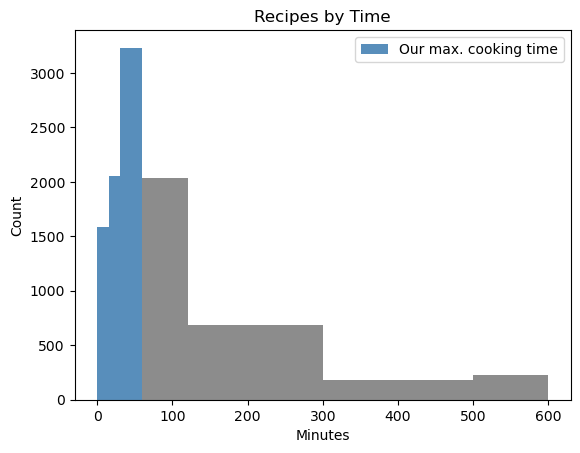

In [3]:
# removing extreme outliers 201610 and 129615 minutes
pd.set_option('display.max_rows', None)
min_hist_data = df['minutes'].sort_values(ascending = False)

custom_bins = [0, 15, 30, 60, 120, 300, 500, 600]
min_hist_data_sorted = min_hist_data.clip(lower=0, upper=600)
print(type(min_hist_data_sorted))
n, bins, patches = plt.hist(min_hist_data_sorted, bins=custom_bins, color='grey', alpha =0.9)
patches[0].set_facecolor('steelblue')
patches[1].set_facecolor('steelblue')
patches[2].set_facecolor('steelblue')
plt.xscale('linear')
plt.xlabel('Minutes')
plt.ylabel('Count')
plt.title('Recipes by Time')

legend_labels = ['Our max. cooking time', 'grey']
plt.legend(legend_labels)

plt.show()

#### Getting deep into 60 minutes cooking time, subsetting df by 60 minutes max.
Considering on most days we can get a main and a side dish ready considering almost 2 people cooking time.


In [4]:
df_upto_60mins = pd.DataFrame(columns = ['name', 'nutrition', 'minutes', 'n_ingredients', 'tags'])
for index, row in df.iterrows():
    if '15-minutes-or-less' in eval(row['tags']) or '30-minutes-or-less' in eval(row['tags']) or '60-minutes-or-less' in eval(row['tags']):
        df_upto_60mins.loc[len(df_upto_60mins.index)] = [row['name'], row['nutrition'], row['minutes'], row['n_ingredients'], row['tags']] 
display(df_upto_60mins.head(5))

,name,nutrition,minutes,n_ingredients,tags
0,arriba baked winter squash mexican style,"[51.5, 0.0, 13.0, 0.0, 2.0, 4.0]",55,7,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']"
1,a bit different breakfast pizza,"[173.4, 18.0, 0.0, 17.0, 22.0, 1.0]",30,6,"['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']"
2,alouette potatoes,"[368.1, 17.0, 10.0, 2.0, 14.0, 20.0]",45,11,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'side-dishes', 'eggs-dairy', 'potatoes', 'vegetables', 'oven', 'easy', 'dinner-party', 'holiday-event', 'easter', 'cheese', 'stove-top', 'dietary', 'christmas', 'new-years', 'thanksgiving', 'independence-day', 'st-patricks-day', 'valentines-day', 'inexpensive', 'brunch', 'superbowl', 'equipment', 'presentation', 'served-hot']"
3,apple a day milk shake,"[160.2, 10.0, 55.0, 3.0, 9.0, 7.0]",0,4,"['15-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'low-protein', '5-ingredients-or-less', 'beverages', 'fruit', 'american', 'easy', 'kid-friendly', 'dietary', 'low-sodium', 'shakes', 'low-calorie', 'low-in-something', 'apples', 'number-of-servings', 'presentation', 'served-cold', '3-steps-or-less']"
4,aww marinated olives,"[380.7, 53.0, 7.0, 24.0, 6.0, 6.0]",15,9,"['15-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'appetizers', 'fruit', 'canadian', 'dinner-party', 'vegan', 'vegetarian', 'freezer', 'dietary', 'equipment', 'number-of-servings']"


#### Picking 50 random main dishes
L29

In [20]:
df_md_upto_60mins = pd.DataFrame(columns = ['name', 'nutrition', 'tags'])

for index, row in df_main_dish.iterrows():
    if '15-minutes-or-less' in eval(row['tags']) or '30-minutes-or-less' in eval(row['tags']) or '60-minutes-or-less' in eval(row['tags']):
        df_md_upto_60mins.loc[len(df_md_upto_60mins.index)] = [row['name'], row['nutrition'], row['tags']] 

#df_md_random = df_md_upto_60mins.sample(n=50, replace=False)
df_md_random = df_md_upto_60mins.head(50)
display(df_md_random)

,name,nutrition,tags
0,a bit different breakfast pizza,"[173.4, 18.0, 0.0, 17.0, 22.0, 1.0]","['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']"
1,cream of spinach soup vegan,"[64.8, 3.0, 13.0, 54.0, 4.0, 3.0]","['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'bisques-cream-soups', 'main-dish', 'soups-stews', 'vegetables', 'vegan', 'vegetarian', 'stove-top', 'dietary', 'one-dish-meal', 'low-cholesterol', 'low-saturated-fat', 'low-calorie', 'comfort-food', 'low-in-something', 'taste-mood', 'equipment']"
2,crispy crunchy chicken,"[335.8, 11.0, 2.0, 24.0, 64.0, 10.0]","['60-minutes-or-less', 'time-to-make', 'course', 'preparation', 'healthy', 'main-dish', 'dietary', 'low-saturated-fat', 'low-in-something']"
3,fool the meat eaters chili,"[295.6, 3.0, 56.0, 76.0, 32.0, 18.0]","['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'lunch', 'main-dish', 'beans', 'vegetables', 'easy', 'beginner-cook', 'fall', 'vegan', 'vegetarian', 'winter', 'chili', 'stove-top', 'dietary', 'spicy', 'one-dish-meal', 'seasonal', 'comfort-food', 'inexpensive', 'peppers', 'taste-mood', 'equipment', 'number-of-servings', 'presentation', 'served-cold']"
4,global gourmet taco casserole,"[456.8, 40.0, 34.0, 67.0, 57.0, 9.0]","['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'casseroles', 'main-dish', 'beef', 'vegetables', 'mexican', 'oven', 'easy', 'holiday-event', 'kid-friendly', 'dietary', 'spicy', 'one-dish-meal', 'seasonal', 'ground-beef', 'meat', 'taste-mood', 'equipment']"
5,how i got my family to eat spinach spinach casserole,"[166.1, 16.0, 6.0, 32.0, 19.0, 3.0]","['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'casseroles', 'main-dish', 'side-dishes', 'eggs-dairy', 'vegetables', 'oven', 'easy', 'potluck', 'vegetarian', 'cheese', 'dietary', 'low-calorie', 'low-carb', 'inexpensive', 'low-in-something', 'to-go', 'equipment', 'grilling', 'number-of-servings']"
6,i don t feel like cooking tonight casserole,"[647.6, 57.0, 57.0, 58.0, 54.0, 16.0]","['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'casseroles', 'main-dish', 'beef', 'oven', 'easy', 'kid-friendly', 'dietary', 'comfort-food', 'ground-beef', 'meat', 'taste-mood', 'equipment']"
7,i stole the idea from mirj sesame noodles,"[783.4, 46.0, 107.0, 56.0, 36.0, 37.0]","['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'main-dish', 'side-dishes', 'pasta', 'asian', 'easy', 'beginner-cook', 'vegetarian', 'dietary', 'pasta-rice-and-grains']"
8,immoral sandwich filling loose meat,"[223.2, 22.0, 4.0, 7.0, 35.0, 0.0]","['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'for-large-groups', 'very-low-carbs', 'lunch', 'main-dish', 'beef', 'easy', 'stove-top', 'dietary', 'sandwiches', 'low-carb', 'inexpensive', 'ground-beef', 'low-in-something', 'meat', 'equipment', 'number-of-servings']"
9,italian sandwich pasta salad,"[279.2, 14.0, 12.0, 22.0, 23.0, 12.0]","['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'main-dish', 'salads', 'pasta', 'easy', 'kid-friendly', 'summer', 'dietary', 'one-dish-meal', 'seasonal', 'pasta-rice-and-grains']"


#### Picking 50 random side dishes
L10

In [21]:
df_app_upto_60mins = pd.DataFrame(columns = ['name', 'nutrition', 'tags'])

for index, row in df_app.iterrows():
    if '15-minutes-or-less' in eval(row['tags']) or '30-minutes-or-less' in eval(row['tags']) or '60-minutes-or-less' in eval(row['tags']):
        df_app_upto_60mins.loc[len(df_app_upto_60mins.index)] = [row['name'], row['nutrition'], row['tags']] 

df_sd_upto_60mins = pd.DataFrame(columns = ['name', 'nutrition', 'tags'])

for index, row in df_sd.iterrows():
    if '15-minutes-or-less' in eval(row['tags']) or '30-minutes-or-less' in eval(row['tags']) or '60-minutes-or-less' in eval(row['tags']):
        df_sd_upto_60mins.loc[len(df_sd_upto_60mins.index)] = [row['name'], row['nutrition'], row['tags']] 

#df_sd_random = df_sd_upto_60mins.sample(n=50, replace=False)
df_sd_random = df_sd_upto_60mins.head(50)
display(df_sd_random)


,name,nutrition,tags
0,arriba baked winter squash mexican style,"[51.5, 0.0, 13.0, 0.0, 2.0, 4.0]","['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']"
1,alouette potatoes,"[368.1, 17.0, 10.0, 2.0, 14.0, 20.0]","['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'side-dishes', 'eggs-dairy', 'potatoes', 'vegetables', 'oven', 'easy', 'dinner-party', 'holiday-event', 'easter', 'cheese', 'stove-top', 'dietary', 'christmas', 'new-years', 'thanksgiving', 'independence-day', 'st-patricks-day', 'valentines-day', 'inexpensive', 'brunch', 'superbowl', 'equipment', 'presentation', 'served-hot']"
2,chile rellenos,"[94.0, 10.0, 0.0, 11.0, 11.0, 0.0]","['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'north-american', '5-ingredients-or-less', 'appetizers', 'side-dishes', 'eggs-dairy', 'american', 'southwestern-united-states', 'easy', 'vegetarian', 'cheese', 'deep-fry', 'dietary', 'oamc-freezer-make-ahead', 'number-of-servings', 'technique']"
3,fried potatoes,"[132.6, 8.0, 4.0, 3.0, 4.0, 6.0]","['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'low-protein', 'healthy', '5-ingredients-or-less', 'side-dishes', 'potatoes', 'vegetables', 'oven', 'easy', 'dietary', 'low-sodium', 'low-cholesterol', 'low-saturated-fat', 'low-calorie', 'healthy-2', 'low-in-something', 'equipment']"
4,i can t believe it s spinach,"[53.8, 5.0, 2.0, 3.0, 3.0, 1.0]","['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'appetizers', 'side-dishes', 'vegetables', 'oven', 'refrigerator', 'freezer', 'dietary', 'oamc-freezer-make-ahead', 'low-carb', 'low-in-something', 'equipment', 'number-of-servings']"
5,italian fries,"[241.0, 12.0, 1.0, 23.0, 10.0, 12.0]","['15-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'healthy', 'side-dishes', 'potatoes', 'vegetables', 'easy', 'beginner-cook', 'kid-friendly', 'dietary', 'low-cholesterol', 'inexpensive', 'healthy-2', 'low-in-something']"
6,jiffy roasted corn and jalapeno cornbread,"[400.2, 32.0, 43.0, 31.0, 21.0, 14.0]","['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'breads', 'side-dishes', 'vegetables', 'easy', 'beginner-cook', 'comfort-food', 'inexpensive', 'corn', 'taste-mood']"
7,mennonite corn fritters,"[67.1, 7.0, 2.0, 7.0, 3.0, 1.0]","['15-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'american', 'easy', 'diabetic', 'dinner-party', 'heirloom-historical', 'holiday-event', 'kid-friendly', 'vegetarian', 'stove-top', 'dietary', 'christmas', 'thanksgiving', 'comfort-food', 'amish-mennonite', 'northeastern-united-states', 'corn', 'taste-mood', 'equipment', 'number-of-servings']"
8,mexican pasta,"[325.3, 10.0, 11.0, 39.0, 26.0, 17.0]","['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'north-american', 'healthy', 'side-dishes', 'pasta', 'mexican', 'easy', 'low-fat', 'dietary', 'inexpensive', 'low-in-something', 'pasta-rice-and-grains']"
9,pick me up party chicken kabobs,"[213.6, 24.0, 0.0, 26.0, 31.0, 0.0]","['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'very-low-carbs', 'appetizers', 'lunch', 'side-dishes', 'poultry', 'chicken', 'dietary', 'high-protein', 'low-carb', 'high-in-something', 'low-in-something', 'meat', 'chicken-breasts']"


#### My hypothetical menu for 50 working days and their combined nutrition
L11

In [22]:
menu_df = df_md_random.copy()
menu_df = menu_df.drop('tags', axis=1)
sd_column_name = df_sd_random['name'].tolist()
sd_column_nutrition = df_sd_random['nutrition'].tolist()

menu_df['other_dish'] = sd_column_name
menu_df['other_dish_nutrition'] = sd_column_nutrition
menu_df.columns = ['main_dish', 'main_dish_nutrition', 'other_dish', 'other_dish_nutrition']
combined_nutrition = []

for index,row in menu_df.iterrows():
    cn = [x + y for x, y in zip(row['main_dish_nutrition'], row['other_dish_nutrition'])]
    cn_round = []
    for num in cn:
        num = round(num,2)
        cn_round.append(num)
    combined_nutrition.append(cn_round)
menu_df['combined_nutrition'] = combined_nutrition
display(menu_df)

,main_dish,main_dish_nutrition,other_dish,other_dish_nutrition,combined_nutrition
0,a bit different breakfast pizza,"[173.4, 18.0, 0.0, 17.0, 22.0, 1.0]",arriba baked winter squash mexican style,"[51.5, 0.0, 13.0, 0.0, 2.0, 4.0]","[224.9, 18.0, 13.0, 17.0, 24.0, 5.0]"
1,cream of spinach soup vegan,"[64.8, 3.0, 13.0, 54.0, 4.0, 3.0]",alouette potatoes,"[368.1, 17.0, 10.0, 2.0, 14.0, 20.0]","[432.9, 20.0, 23.0, 56.0, 18.0, 23.0]"
2,crispy crunchy chicken,"[335.8, 11.0, 2.0, 24.0, 64.0, 10.0]",chile rellenos,"[94.0, 10.0, 0.0, 11.0, 11.0, 0.0]","[429.8, 21.0, 2.0, 35.0, 75.0, 10.0]"
3,fool the meat eaters chili,"[295.6, 3.0, 56.0, 76.0, 32.0, 18.0]",fried potatoes,"[132.6, 8.0, 4.0, 3.0, 4.0, 6.0]","[428.2, 11.0, 60.0, 79.0, 36.0, 24.0]"
4,global gourmet taco casserole,"[456.8, 40.0, 34.0, 67.0, 57.0, 9.0]",i can t believe it s spinach,"[53.8, 5.0, 2.0, 3.0, 3.0, 1.0]","[510.6, 45.0, 36.0, 70.0, 60.0, 10.0]"
5,how i got my family to eat spinach spinach casserole,"[166.1, 16.0, 6.0, 32.0, 19.0, 3.0]",italian fries,"[241.0, 12.0, 1.0, 23.0, 10.0, 12.0]","[407.1, 28.0, 7.0, 55.0, 29.0, 15.0]"
6,i don t feel like cooking tonight casserole,"[647.6, 57.0, 57.0, 58.0, 54.0, 16.0]",jiffy roasted corn and jalapeno cornbread,"[400.2, 32.0, 43.0, 31.0, 21.0, 14.0]","[1047.8, 89.0, 100.0, 89.0, 75.0, 30.0]"
7,i stole the idea from mirj sesame noodles,"[783.4, 46.0, 107.0, 56.0, 36.0, 37.0]",mennonite corn fritters,"[67.1, 7.0, 2.0, 7.0, 3.0, 1.0]","[850.5, 53.0, 109.0, 63.0, 39.0, 38.0]"
8,immoral sandwich filling loose meat,"[223.2, 22.0, 4.0, 7.0, 35.0, 0.0]",mexican pasta,"[325.3, 10.0, 11.0, 39.0, 26.0, 17.0]","[548.5, 32.0, 15.0, 46.0, 61.0, 17.0]"
9,italian sandwich pasta salad,"[279.2, 14.0, 12.0, 22.0, 23.0, 12.0]",pick me up party chicken kabobs,"[213.6, 24.0, 0.0, 26.0, 31.0, 0.0]","[492.8, 38.0, 12.0, 48.0, 54.0, 12.0]"


#### Splitting nutrition array and normalizing to 700 calories
nutrition array is 'calories, fat, sugar, sodium, protein, carbs' 
splitting this array into columns 
since total calorie consumption per day is ~2000, considering dinner will have ~700 if there are 3 meals a day of 700 calorie each

In [23]:
import ast
calories = []
total_fat = []
normalized_total_fat = []
sugar = []
normalized_sugar = []
sodium = []
normalized_sodium = []
protein = []
normalized_protein = []
carbs = []
normalized_carbs = []
normalization_factor = []

for index, row in menu_df.iterrows():
    nutrition = row['combined_nutrition']
    current_normalization_factor = 1
    if nutrition[0] > 0:
        current_normalization_factor = 700/nutrition[0]
    calories.append(nutrition[0])
    total_fat.append(nutrition[1])
    normalized_total_fat.append(nutrition[1] * current_normalization_factor)
    sugar.append(nutrition[2])
    normalized_sugar.append(nutrition[2] * current_normalization_factor)
    sodium.append(nutrition[3])
    normalized_sodium.append(nutrition[3] * current_normalization_factor)
    protein.append(nutrition[4])
    normalized_protein.append(nutrition[4] * current_normalization_factor)
    carbs.append(nutrition[5])
    normalized_carbs.append(nutrition[5] * current_normalization_factor)
    normalization_factor.append(current_normalization_factor)
       
#print(calories)
menu_df['calories'] = calories
menu_df['calorie_normal'] = 700
menu_df['normalization_factor'] = normalization_factor
menu_df['total_fat'] = total_fat
menu_df['normalized_total_fat'] = normalized_total_fat
menu_df['sugar'] = sugar
menu_df['normalized_sugar'] = normalized_sugar
menu_df['sodium'] = sodium
menu_df['normalized_sodium'] = normalized_sodium
menu_df['protein'] = protein
menu_df['normalized_protein'] = normalized_protein
menu_df['carbs'] = carbs
menu_df['normalized_carbs'] = normalized_carbs
pd.set_option('display.max_rows', None)
display(menu_df.head(5))

,main_dish,main_dish_nutrition,other_dish,other_dish_nutrition,combined_nutrition,calories,calorie_normal,normalization_factor,total_fat,normalized_total_fat,sugar,normalized_sugar,sodium,normalized_sodium,protein,normalized_protein,carbs,normalized_carbs
0,a bit different breakfast pizza,"[173.4, 18.0, 0.0, 17.0, 22.0, 1.0]",arriba baked winter squash mexican style,"[51.5, 0.0, 13.0, 0.0, 2.0, 4.0]","[224.9, 18.0, 13.0, 17.0, 24.0, 5.0]",224.9,700,3.112494,18.0,56.024900,13.0,40.462428,17.0,52.912406,24.0,74.699867,5.0,15.562472
1,cream of spinach soup vegan,"[64.8, 3.0, 13.0, 54.0, 4.0, 3.0]",alouette potatoes,"[368.1, 17.0, 10.0, 2.0, 14.0, 20.0]","[432.9, 20.0, 23.0, 56.0, 18.0, 23.0]",432.9,700,1.617002,20.0,32.340032,23.0,37.191037,56.0,90.552091,18.0,29.106029,23.0,37.191037
2,crispy crunchy chicken,"[335.8, 11.0, 2.0, 24.0, 64.0, 10.0]",chile rellenos,"[94.0, 10.0, 0.0, 11.0, 11.0, 0.0]","[429.8, 21.0, 2.0, 35.0, 75.0, 10.0]",429.8,700,1.628664,21.0,34.201954,2.0,3.257329,35.0,57.003257,75.0,122.149837,10.0,16.286645
3,fool the meat eaters chili,"[295.6, 3.0, 56.0, 76.0, 32.0, 18.0]",fried potatoes,"[132.6, 8.0, 4.0, 3.0, 4.0, 6.0]","[428.2, 11.0, 60.0, 79.0, 36.0, 24.0]",428.2,700,1.634750,11.0,17.982251,60.0,98.085007,79.0,129.145259,36.0,58.851004,24.0,39.234003
4,global gourmet taco casserole,"[456.8, 40.0, 34.0, 67.0, 57.0, 9.0]",i can t believe it s spinach,"[53.8, 5.0, 2.0, 3.0, 3.0, 1.0]","[510.6, 45.0, 36.0, 70.0, 60.0, 10.0]",510.6,700,1.370936,45.0,61.692127,36.0,49.353702,70.0,95.965531,60.0,82.256169,10.0,13.709362


#### Checking for correlation
Fat, Sugar, Sodium, Protein and Carbs have been normalized for 700 calories. Logically, they are correlated but a doouble check to see the increase in calories has an increase in these values.

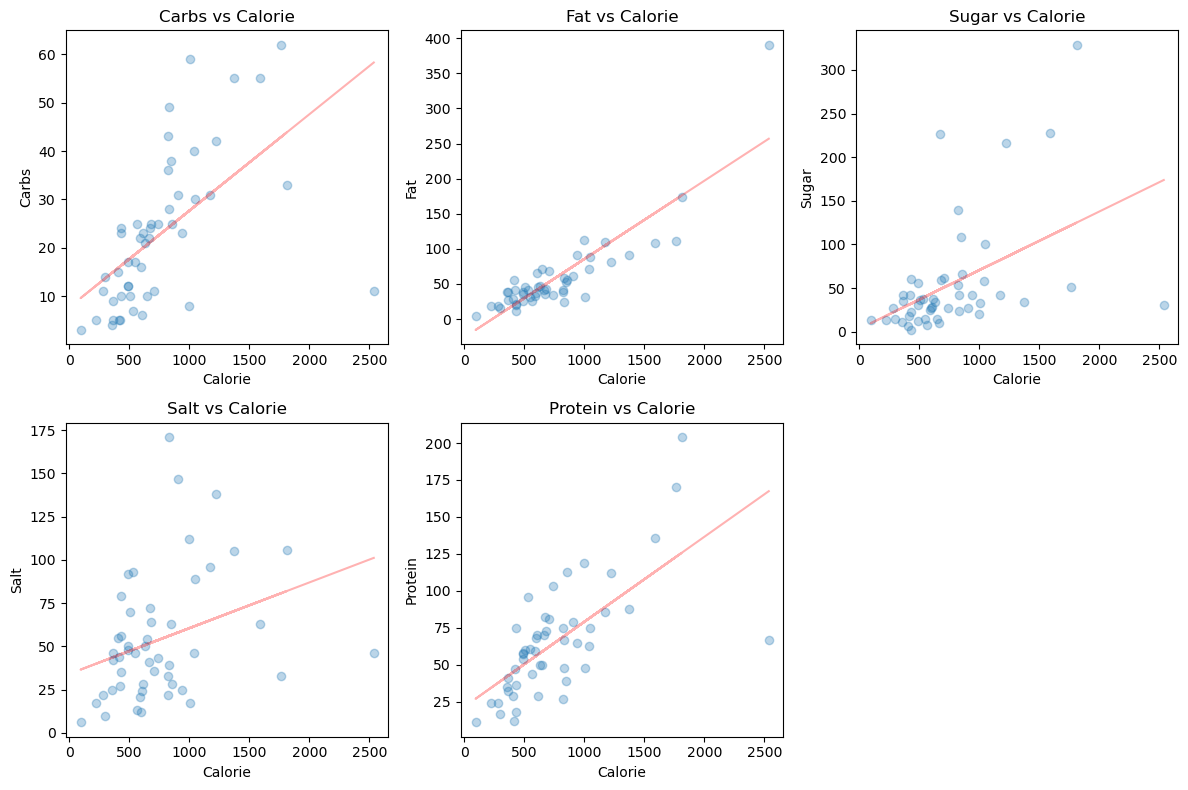

In [24]:
import numpy as np

calories = menu_df['calories']
carbs = menu_df['carbs']

protein = menu_df['protein']
fat = menu_df['total_fat']
sodium = menu_df['sodium']

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
y_data = [carbs, fat, sugar, sodium, protein]
y_labels = ['Carbs', 'Fat', 'Sugar', 'Salt', 'Protein']

for i, ax in enumerate(axes.flatten()):
    if i < len(y_data): 
        ax.scatter(calories, y_data[i], alpha=0.3)
        ax.set_title(f"{y_labels[i]} vs Calorie")
        ax.set_xlabel('Calorie')
        ax.set_ylabel(y_labels[i])

        coefficients = np.polyfit(calories, y_data[i], 1)
        correlation_line = np.polyval(coefficients, calories)
        ax.plot(calories, correlation_line, color='red', alpha= 0.3)

        #ax.legend()
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()


#### Calorie Distribution
A rough estimate of calorie distribution is:<br>
45-65% - carbs<br>
10-35% - protein<br>
25-35% - fats<br>
10% - sugar<br>
If I had more time I would made an overlapping range with these estimates.


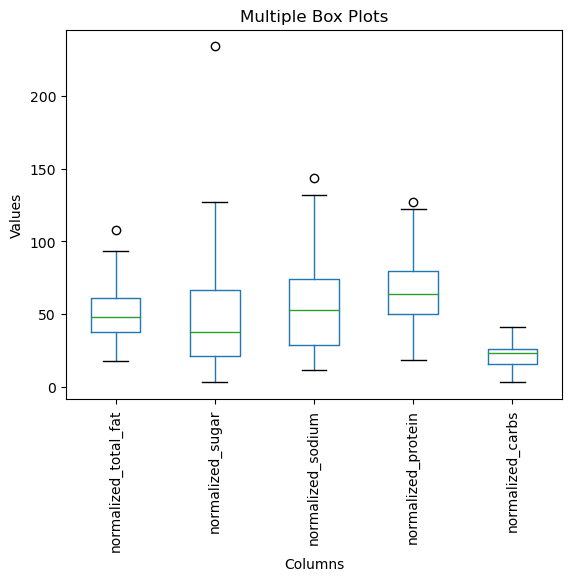

In [25]:
import matplotlib.pyplot as plt

menu_df.boxplot(column=['normalized_total_fat', 'normalized_sugar', 'normalized_sodium', 'normalized_protein', 'normalized_carbs'])

plt.grid(visible = False)
plt.xlabel('Columns')
plt.xticks(rotation = 90)
plt.ylabel('Values')
plt.title('Multiple Box Plots')

plt.show()

In [26]:
import matplotlib.pyplot as plt
from itertools import chain

xaxis = []
xaxis.append(['fat' for _ in range(50)])
xaxis.append(['sugar' for _ in range(50)])
xaxis.append(['sodium' for _ in range(50)])
xaxis.append(['protein' for _ in range(50)])
xaxis.append(['carbs' for _ in range(50)])

def flatten_list(nested_list):
    return list(chain.from_iterable(nested_list))
xaxis_flat = flatten_list(xaxis)

yaxis = []
fat = menu_df['normalized_total_fat'].tolist()
sugar = menu_df['normalized_sugar'].tolist()
salt = menu_df['normalized_sodium'].tolist()
protein = menu_df['normalized_protein'].tolist()
carbs = menu_df['normalized_carbs'].tolist()
yaxis.append(fat)
yaxis.append(sugar)
yaxis.append(salt)
yaxis.append(protein)
yaxis.append(carbs)
yaxis_flat = flatten_list(yaxis)

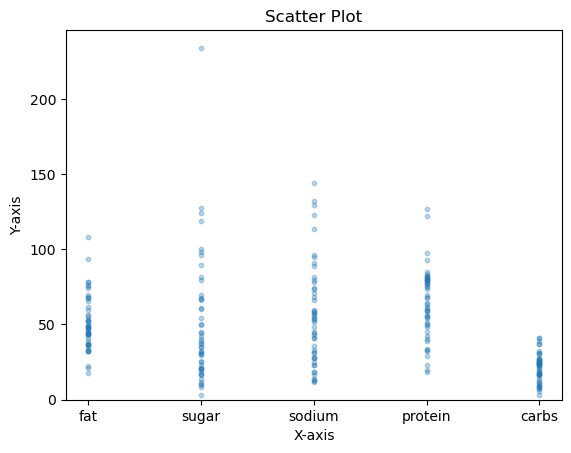

In [27]:
import matplotlib.pyplot as plt

plt.scatter(xaxis_flat, yaxis_flat, alpha = 0.3, s=10)
plt.ylim(0)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

plt.show()

#### Chi-square test (goodness of fit)
To determine if the distribution of recipe compositions (protein, carbs, fat, sugar) in sample dataset follows the expected percentages (10-35% protein, 45-65% carbs, 25-35% fat, 10% sugar) for a 700-calorie meal.

In [13]:
#exhaustive datset for test
#display(df_md_upto_60mins.head(5))
#display(df_sd_upto_60mins.head(5))
#display(df_md_upto_60mins['name'].head(5))
#display(df_md_upto_60mins['nutrition'].head(5))
selected_cols = ['name', 'nutrition']
selected_df_md = df_md_upto_60mins[selected_cols]
selected_df_sd = df_sd_upto_60mins[selected_cols]

import pandas as pd

# Combining the dataframes with cross join
combined_df = pd.merge(selected_df_md.assign(key=1), selected_df_sd.assign(key=1), on='key').drop('key', axis=1)
combined_df = combined_df.rename(columns={'name_x':'main_dish', 'nutrition_x': 'main_dish_nutrition', 'name_y': 'other_dish', 'nutrition_y': 'other_dish_nutrition'})
#display(combined_df.head(5))
combined_nutrition = []
for index,row in combined_df.iterrows():
    cn = [x + y for x, y in zip(row['main_dish_nutrition'], row['other_dish_nutrition'])]
    cn_round = []
    for num in cn:
        num = round(num,2)
        cn_round.append(num)
        #print(cn_round)
    combined_nutrition.append(cn_round)
combined_df['combined_nutrition'] = combined_nutrition
#display(combined_df.head(5))

#import ast
calories = []
total_fat = []
normalized_total_fat = []
sugar = []
normalized_sugar = []
sodium = []
normalized_sodium = []
protein = []
normalized_protein = []
carbs = []
normalized_carbs = []
normalization_factor = []

for index, row in combined_df.iterrows():
    nutrition = row['combined_nutrition']
    current_normalization_factor = 1
    if nutrition[0] > 0:
        current_normalization_factor = 700/nutrition[0]
    calories.append(nutrition[0])
    total_fat.append(nutrition[1])
    normalized_total_fat.append(nutrition[1] * current_normalization_factor)
    sugar.append(nutrition[2])
    normalized_sugar.append(nutrition[2] * current_normalization_factor)
    sodium.append(nutrition[3])
    normalized_sodium.append(nutrition[3] * current_normalization_factor)
    protein.append(nutrition[4])
    normalized_protein.append(nutrition[4] * current_normalization_factor)
    carbs.append(nutrition[5])
    normalized_carbs.append(nutrition[5] * current_normalization_factor)
    normalization_factor.append(current_normalization_factor)
       
combined_df['calories'] = calories
combined_df['calorie_normal'] = 700
combined_df['normalization_factor'] = normalization_factor
combined_df['total_fat'] = total_fat
combined_df['normalized_total_fat'] = normalized_total_fat
combined_df['sugar'] = sugar
combined_df['normalized_sugar'] = normalized_sugar
combined_df['sodium'] = sodium
combined_df['normalized_sodium'] = normalized_sodium
combined_df['protein'] = protein
combined_df['normalized_protein'] = normalized_protein
combined_df['carbs'] = carbs
combined_df['normalized_carbs'] = normalized_carbs
pd.set_option('display.max_rows', None)
#display(combined_df.head(5))
menu_df = combined_df
#removed all rows that contained zero for chi square test
menu_df = menu_df[(menu_df != 0).all(axis=1)]

In [14]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from scipy.stats import chi2_contingency

observed_protein = menu_df['normalized_protein'].tolist()
observed_carbs = menu_df['normalized_carbs'].tolist()
observed_fat = menu_df['normalized_total_fat'].tolist()
observed_sugar = menu_df['normalized_sugar'].tolist()
total_calories = 700

expected_protein = np.array([0.10, 0.15, 0.20, 0.25, 0.30, 0.35]) * total_calories
expected_carbs = np.array([0.45, 0.50, 0.55, 0.60, 0.65]) * total_calories
expected_fat = np.array([0.25, 0.27, 0.30, 0.32, 0.35]) * total_calories
expected_sugar = np.array([0.10, 0.10, 0.10, 0.10, 0.10]) * total_calories

# Create the observed and expected frequency arrays
observed = np.array([observed_protein, observed_carbs, observed_fat, observed_sugar])
expected = np.array([expected_protein, expected_carbs, expected_fat, expected_sugar])

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(observed)

# Print the test result
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
# A chi-square statistic of <2k+> a significant difference between the observed frequencies and the expected frequencies based on 
#the specified percentage distributions for protein, carbs, fat, and sugar.

#Therefore, you would reject the null hypothesis and conclude that the recipes in the sample dataset do not 
#follow the specified percentage distributions.

Chi-square statistic: 58451303.95075063
P-value: 0.0


Since the chi-square statistic is large and the associated p-value is less than the chosen level of significance, it suggests that there is a significant difference between the observed and expected frequencies.

#### Cleaning My Kitchen and then Cleaning my Data

Made a list of basic ingredients found in my kitchen.

Cleaned the dataset to simplify, for example:<br>
frozen spinach, fresh spinach, chopped spinach --> spinach<br>
tomato paste, diced tomato, chopped tomato, tomato juice, tomato puree --> tomatoes<br>

It's almost impossible to consider cleaning all ingredients manually, the way I started.
NLTK (Natural Language Toolkit) is the library I discovered that can help me process, tokenize and parse human language data.


In [15]:
import ast
basic_cond = ['salt', 'sugar', 'pepper', 'soy sauce', 'ketchup', 'mustard', 'vinegar', 'oil', 'honey', 'chili', 'chilli', 'cumin', 'tea', 'coffee', 'cocoa', 'red chile']
basic_veg = ['carrot', 'onion', 'garlic', 'tomatoes', 'potato', 'potatoes', 'red bell pepper', 'green bell pepper', 'carrots', 'onion', 'tomato', 'potato', 'bell pepper', 'ginger', 'gingerroot', 'eggplant', 'mushroom', 'green beans', 'peas', 'cucumber', 'cucumbers', 'cauliflower', 'spinach', 'cabbage', 'vegetable', 'mushroom', 'mushrooms', 'corn']
basic_fruit = ['apples', "apple", 'bananas', 'banana', 'oranges', 'grapes', 'strawberry', 'watermelons', 'pineapple', 'mangoes', 'mango', 'pears', "pear", 'peaches', 'cherrys', 'lemon', 'lime', 'coconut', 'pomegranate', 'strawberries']
basic_amp = ["eggs", "milk", "cheese", "ghee", "butter", "yogurt", "cream", 'margarine', 'heavy cream', 'sour cream', 'buttermilk']
basic_grain = ['rice', 'wheat', 'corn', 'oats', 'amaranth', 'sorghum', 'semolina', 'millet']
basic_nuts = ["almonds", "cashews", "walnuts", "pecans", "pistachios", "macadamias", "macadamias", "hazelnuts", "peanuts", "raisins", 'nuts', 'apricot', 'coconut', 'pine nuts', 'dates']
basic_beans = ["black beans", "pinto beans", "kidney beans", "navy beans", "lima beans", "garbanzo beans", "lentils", "split peas", "soybeans"]
basic_spices = ['cinnamon', 'nutmeg', 'fennel', 'bay leaves', 'bay leaf', 'turmeric', 'paprika', 'clove', 'basil', 'parsley', 'cloves', 'oregano', 'thyme', 'sesame seeds', 'coriander', 'mint', 'dill', 'saffron']
basic_baking = ['baking powder', 'baking soda', 'vanilla', 'vanilla extract', 'vanilla essence', 'almond extract', 'maple syrup', 'bread', 'chocolate', 'yeast', 'breadcrumbs', 'jam']
basic_sauce = ['mayonnaise']
alcohol = ['rum', 'beer', 'vodka', 'taquila', 'bourbon']
other = ['water', 'ice', 'cornstarch', 'pasta', 'curry powder', 'soda']
basic_ing = basic_cond + basic_veg + basic_fruit + basic_amp + basic_grain + basic_nuts + basic_beans + basic_spices + basic_baking + basic_sauce + alcohol + other

#add basic ingredients to dataframe
df['basic_ing'] = [basic_ing] * len(df)
df['basic_ing'] = df['basic_ing']

#cleaning ingredients
for index, row in df.iterrows():
    ing = ast.literal_eval(row['ingredients'])

    new_ingredients = []
    for item in ing:
        if 'oil' in item:
            new_ingredients.append('oil')
        elif 'salt and pepper' in item:
            new_ingredients.append('salt')
            new_ingredients.append('pepper')
        elif 'cheese' in item:
            new_ingredients.append('cheese')
        elif 'cumin' in item:
            new_ingredients.append('cumin')
        elif 'tomato paste' in item or 'diced tomato' in item or 'rotel tomatoes' in item or 'tomato soup' in item or 'tomato juice' in item or 'tomatoes' in item or 'tomato sauce' in item or 'tomato puree' in item or 'chopped tomato' in item or 'roma tomato' in item:
            new_ingredients.append('tomatoes')
        elif 'onions' in item or 'onion' in item or 'shallots' in item:
            new_ingredients.append('onion')
        elif 'apple juice' in item or 'applesauce' in item or 'apple' in item:
            new_ingredients.append('apples')
        elif 'orange' in item:
            new_ingredients.append('oranges')
        elif 'lemon' in item or 'lime' in item:
            new_ingredients.append('lemon')
        elif 'sugar' in item:
            new_ingredients.append('sugar')
        elif 'chilies' in item or 'chili' in item or 'hot sauce' in item or 'red chilie' in item:
            new_ingredients.append('chilli')
        elif 'peanuts' in item:
            new_ingredients.append('peanuts')
        elif 'potatoes' in item:
            new_ingredients.append('potato')
        elif 'salt' in item:
            new_ingredients.append('salt')
        elif 'pepper' in item:
            new_ingredients.append('pepper')
        elif 'egg' in item:
            new_ingredients.append('eggs')
        elif 'mustard' in item:
            new_ingredients.append('mustard')
        elif 'flour' in item:
            new_ingredients.append('wheat')
        elif 'ginger' in item:
            new_ingredients.append('ginger')
        elif 'garlic' in item:
            new_ingredients.append('garlic')
        elif 'cinnamon' in item:
            new_ingredients.append('cinnamon')
        elif 'fennel' in item:
            new_ingredients.append('fennel')
        elif 'ice' in item or 'water' in item:
            new_ingredients.append('water')
        elif 'yogurt' in item:
            new_ingredients.append('yogurt')
        elif 'spinach' in item:
            new_ingredients.append('spinach')
        elif 'apricot' in item:
            new_ingredients.append('apricot')
        elif 'coconut' in item:
            new_ingredients.append('coconut')
        elif 'nutmeg' in item:
            new_ingredients.append('nutmeg')
        elif 'milk' in item:
            new_ingredients.append('milk')
        elif 'parsley'in item:
            new_ingredients.append('parsley')
        elif 'oregano' in item:
            new_ingredients.append('oregano')
        elif 'cilantro' in item:
            new_ingredients.append('cilantro')
        elif 'pasta' in item:
            new_ingredients.append('pasta')
        elif 'vegetable' in item:
            new_ingredients.append('vegetable')
        elif 'almonds' in item or 'almond' in item:
            new_ingredients.append('almonds')
        elif 'cloves' in item:
            new_ingredients.append('cloves')
        elif 'basil' in item:
            new_ingredients.append('basil')
        elif 'thyme' in item:
            new_ingredients.append('thyme')
        elif 'oats' in item or 'oatmeal' in item:
            new_ingredients.append('oats')
        elif 'cream' in item:
            new_ingredients.append('cream')
        elif 'peanut' in item:
            new_ingredients.append('peanuts')
        elif 'mushrooms' in item:
            new_ingredients.append('mushrooms')
        elif 'strawberries' in item:
            new_ingredients.append('strawberries')
        elif 'yeast' in item:
            new_ingredients.append('yeast')
        elif 'baguette' in item:
            new_ingredients.append('bread')
        elif 'coriander' in item:
            new_ingredients.append('coriander')
        elif 'turmeric' in item:
            new_ingredients.append('turmeric')
        elif 'tea' in item:
            new_ingredients.append('tea')
        elif 'soda' in item:
            new_ingredients.append('soda')
        elif 'kidney beans' in item:
            new_ingredients.append('kidney beans')
        elif 'breadcrumbs' in item:
            new_ingredients.append('breadcrumbs')
        elif 'bread' in item:
            new_ingredients.append('bread')
        elif 'chocolate' in item:
            new_ingredients.append('chocolate')
        elif 'carrots' in item:
            new_ingredients.append('carrots')
        elif 'corn' in item or 'cornflakes' in item:
            new_ingredients.append('corn')
        elif 'cocoa' in item:
            new_ingredients.append('cocoa')
        elif 'rum' in item:
            new_ingredients.append('rum')
        elif 'cabbage' in item:
            new_ingredients.append('cabbage')
        elif 'macadamia' in item:
            new_ingredients.append('macadamia')
        else:
            new_ingredients.append(item)
    df.at[index, 'ingredients'] = new_ingredients

def calculate_difference(row):
    set1 = set(row['ingredients'])
    set2 = set(row['basic_ing'])
    diff = set1 - set2
    return list(diff)

def n_diff(row):
    return len(row['diff'])

df['diff'] = df.apply(calculate_difference, axis=1)
df['len_diff'] = df.apply(n_diff, axis = 1)

display(df.head(5))


,name,minutes,nutrition,n_steps,ingredients,n_ingredients,tags,basic_ing,diff,len_diff
0,arriba baked winter squash mexican style,55,"[51.5, 0.0, 13.0, 0.0, 2.0, 4.0]",11,"[winter squash, mexican seasoning, water, honey, butter, oil, salt]",7,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']","[salt, sugar, pepper, soy sauce, ketchup, mustard, vinegar, oil, honey, chili, chilli, cumin, tea, coffee, cocoa, red chile, carrot, onion, garlic, tomatoes, potato, potatoes, red bell pepper, green bell pepper, carrots, onion, tomato, potato, bell pepper, ginger, gingerroot, eggplant, mushroom, green beans, peas, cucumber, cucumbers, cauliflower, spinach, cabbage, vegetable, mushroom, mushrooms, corn, apples, apple, bananas, banana, oranges, grapes, strawberry, watermelons, pineapple, mangoes, mango, pears, pear, peaches, cherrys, lemon, lime, coconut, pomegranate, strawberries, eggs, milk, cheese, ghee, butter, yogurt, cream, margarine, heavy cream, sour cream, buttermilk, rice, wheat, corn, oats, amaranth, sorghum, semolina, millet, almonds, cashews, walnuts, pecans, pistachios, macadamias, macadamias, hazelnuts, peanuts, raisins, nuts, apricot, coconut, pine nuts, dates, black beans, pinto beans, ...]","[winter squash, mexican seasoning]",2
1,a bit different breakfast pizza,30,"[173.4, 18.0, 0.0, 17.0, 22.0, 1.0]",9,"[prepared pizza crust, sausage patty, eggs, milk, salt, pepper, cheese]",6,"['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']","[salt, sugar, pepper, soy sauce, ketchup, mustard, vinegar, oil, honey, chili, chilli, cumin, tea, coffee, cocoa, red chile, carrot, onion, garlic, tomatoes, potato, potatoes, red bell pepper, green bell pepper, carrots, onion, tomato, potato, bell pepper, ginger, gingerroot, eggplant, mushroom, green beans, peas, cucumber, cucumbers, cauliflower, spinach, cabbage, vegetable, mushroom, mushrooms, corn, apples, apple, bananas, banana, oranges, grapes, strawberry, watermelons, pineapple, mangoes, mango, pears, pear, peaches, cherrys, lemon, lime, coconut, pomegranate, strawberries, eggs, milk, cheese, ghee, butter, yogurt, cream, margarine, heavy cream, sour cream, buttermilk, rice, wheat, corn, oats, amaranth, sorghum, semolina, millet, almonds, cashews, walnuts, pecans, pistachios, macadamias, macadamias, hazelnuts, peanuts, raisins, nuts, apricot, coconut, pine nuts, dates, black beans, pinto beans, ...]","[prepared pizza crust, sausage patty]",2
2,all in the kitchen chili,130,"[269.8, 22.0, 32.0, 48.0, 39.0, 5.0]",6,"[ground beef, onion, tomatoes, tomatoes, tomatoes, tomatoes, kidney beans, water, chilli, cumin, salt, lettuce, cheese]",13,"['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']","[salt, sugar, pepper, soy sauce, ketchup, mustard, vinegar, oil, honey, chili, chilli, cumin, tea, coffee, cocoa, red chile, carrot, onion, garlic, tomatoes, potato, potatoes, red bell pepper, green bell pepper, carrots, onion, tomato, potato, bell pepper, ginger, gingerroot, eggplant, mushroom, green beans, peas, cucumber, cucumbers, cauliflower, spinach, cabbage, vegetable, mushroom, mushrooms, corn, apples, apple, bananas, banana, oranges, grapes, strawberry, watermelons, pineapple, mangoes, mango, pears, pear, peaches, cherrys, lemon, lime, coconut, pomegranate, strawberries, eggs, milk, cheese, ghee, butter, yogurt, cream, margarine, heavy cream, sour cream, buttermilk, rice, wheat, corn, oats, amaranth, sorghum, semolina, millet, almonds, cashews, walnuts, pecans, pistachios, macadamias, 

#### Make a list of things I need to start having
Dataframe and count of items I need to buy and how many recipes I can possibly start looking into

In [16]:
combined_list = [item for sublist in df['diff'] for item in sublist]

item_counts = {}

for item in combined_list:
    if item in item_counts:
        item_counts[item] += 1
    else:
        item_counts[item] = 1

df_remain = pd.DataFrame.from_dict(item_counts, orient='index', columns=['Count'])

df_remain.index.name = 'Item'
df_remain_sorted = df_remain.sort_values(by='Count', ascending=False)
pd.set_option('display.max_rows', None)
display(df_remain_sorted)


,Count
Item,
celery,359
cilantro,337
chicken broth,304
worcestershire sauce,267
bacon,242
ground beef,206
asparagus,203
chicken stock,144
balsamic vinegar,131


#### Top 50 things I need to buy 

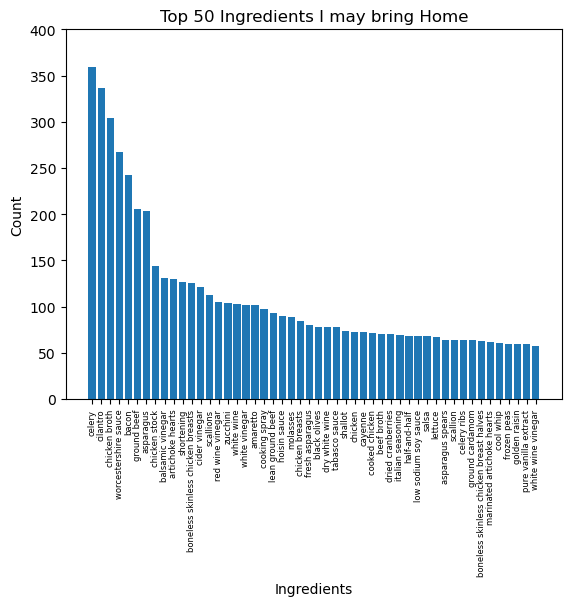

<Figure size 1500x600 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt

df_top_75_missing_ing = df_remain_sorted.head(50)
plt.bar(df_top_75_missing_ing.index, df_top_75_missing_ing['Count'])

plt.xlabel('Ingredients')
plt.ylabel('Count')
plt.title('Top 50 Ingredients I may bring Home')
plt.ylim(0, 400)
plt.xticks(rotation=90, fontsize=6)

width = 15
height = 6
plt.figure(figsize=(width, height))
plt.show()

#### Is there a relation between cooking time and # of ingredients?
If I had more time, I would have found out the few ingredients that are possibly associated with increased cooking time.
Note: there are 2 incorrect tags, where the actual cooking time is 80 and 140 mins.<br>
Going forward, it would be a good idea to have more than one test conditions while subsetting dataframes.<br>
I subsetted by tags, but should have double checked by cooking time.<br>

For now, ignoring those two.

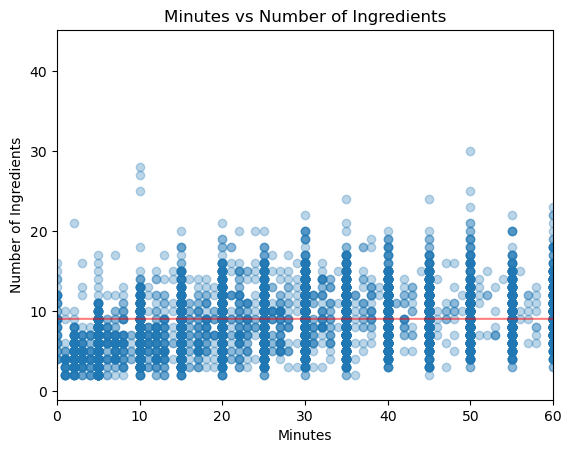

In [18]:
import matplotlib.pyplot as plt
import numpy as np

df_upto_60mins = df.sort_values(by = 'minutes', ascending = False)

minutes = df_upto_60mins['minutes']
ingredients = df_upto_60mins['n_ingredients']

plt.scatter(minutes, ingredients, alpha=0.3)

m, b = np.polyfit(minutes, ingredients, 1)
line_fit = m * np.array(minutes) + b

plt.plot(minutes, line_fit, color='red', alpha=0.5)

plt.title('Minutes vs Number of Ingredients')
plt.xlabel('Minutes')
plt.ylabel('Number of Ingredients')

plt.xlim(0, 60)

plt.show()


#### Summary stats for minutes, no. of steps and no. of ingredients

In [19]:
from tabulate import tabulate

columns_of_interest = ['minutes', 'n_steps', 'n_ingredients']
summary_stats = df[columns_of_interest].describe().round(2)
table = tabulate(summary_stats, headers='keys', tablefmt='pretty')
print('Summary Statistics(minutes, #steps, #ingredients)')
print(table)

Summary Statistics(minutes, #steps, #ingredients)
+-------+----------+---------+---------------+
|       | minutes  | n_steps | n_ingredients |
+-------+----------+---------+---------------+
| count | 10000.0  | 10000.0 |    10000.0    |
| mean  |  155.68  |  9.72   |     9.01      |
|  std  | 2636.22  |  6.24   |     3.74      |
|  min  |   0.0    |   0.0   |      1.0      |
|  25%  |   20.0   |   6.0   |      6.0      |
|  50%  |   38.0   |   9.0   |      9.0      |
|  75%  |   65.0   |  12.0   |     11.0      |
|  max  | 201610.0 |  108.0  |     43.0      |
+-------+----------+---------+---------------+
